### 1. Load and Preprocess the Dataset
In this, I have taken a subset of cancer images from kaggle and make my dataset of 500 images. First we have to load and preprocess the images from dataset.

Importing libraries,
- `tensorflow.keras.preprocessing.image.ImageDataGenerator` for loading the images in the preprocessed form
- `matplotlib.pyplot` for seeing the images

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Specifying the directory and other hyperperameters,

In [2]:
directory = 'dataset'

In [3]:
img_size = (128, 128)
bach_size = 32

Creating `ImageDataGenerator` object with preprocessing of image from [0, 255] -> [0, 1] normalization, and validation split,

In [4]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

Creating the train and dev datasets with `80%` and `20%` split,

In [5]:
train = datagen.flow_from_directory(
    directory,
    target_size=img_size,
    batch_size=bach_size,
    class_mode='binary',
    subset='training'
)

Found 400 images belonging to 2 classes.


In [6]:
dev = datagen.flow_from_directory(
    directory,
    target_size=img_size,
    batch_size=bach_size,
    class_mode='binary',
    subset='validation'
)

Found 100 images belonging to 2 classes.


Lets see some preprocessed images,

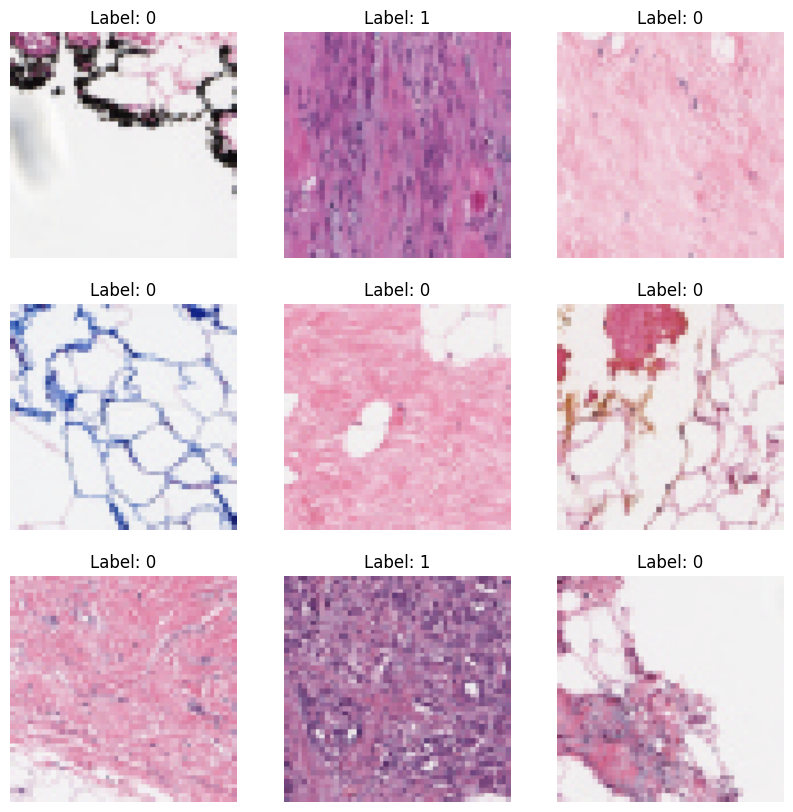

In [7]:
X_batch, y_batch = next(train)

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_batch[i])
    plt.title(f"Label: {int(y_batch[i])}")
    plt.axis("off")
plt.show()

### 2. Train and Evaluate the Model
In this section, we'll train the `cnn` model using `tensorflow` and `keras`

Importing libraries,
- `tensorflow` framework of nural network
- and varioues supporting libraries

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.activations import relu, softmax, linear
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy

Now creating the architecture of the model,

In [9]:
model_manual = Sequential([
    Input(shape=(128, 128, 3)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation=linear)
])

Now, compiling the model with hyperperameters,

In [10]:
model_manual.compile(
    optimizer=Adam(),
    loss=BinaryCrossentropy(from_logits=True),
    metrics=[BinaryAccuracy()],
)

Now the summary of our created model that is going to be trained,

In [11]:
model_manual.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Lets start training,

In [13]:
model_manual.fit(
    train,
    validation_data=dev,
    epochs=10
)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - binary_accuracy: 0.7176 - loss: 0.6105 - val_binary_accuracy: 0.7100 - val_loss: 0.5798
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - binary_accuracy: 0.7226 - loss: 0.5751 - val_binary_accuracy: 0.7100 - val_loss: 0.6167
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - binary_accuracy: 0.7107 - loss: 0.6158 - val_binary_accuracy: 0.7100 - val_loss: 0.5803
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - binary_accuracy: 0.7304 - loss: 0.5861 - val_binary_accuracy: 0.7100 - val_loss: 0.5734
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - binary_accuracy: 0.6925 - loss: 0.5839 - val_binary_accuracy: 0.7100 - val_loss: 0.5465
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - binary_accuracy: 0.7164 - loss: 0.5487 - val_binary_accuracy: 0.7100 - val_loss: 0.5316
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - binary_accuracy: 0.7318 - loss: 0.5143 - val_binary_accuracy: 0.7100 - val_loss: 0.5312
Epoch 8/10
13/13 ━━━

So here we are ended up with `val accuracy` of `71%` which is quite good for such smaller and less complex model. And also we seen the `high variance` problem a little bit. As we have no human level measure so we are not able to decide if there is `high bias` problem or not.

### 3. Transfer Learning
Now, lets try transfer learning on pretrained model `VGG16 on ImageNet` and see the purforemance.
Importing libraries,
- Some from `section 2`
- `tensorflow.keras.applications.VGG16` to apply transfer learning on it

In [14]:
from tensorflow.keras.applications import VGG16

Now load the base model trained on `ImageNet` dataset,

In [15]:
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(128, 128, 3)
)

As we have small dataset, so we only train top layers and off the base_model layes,

In [16]:
for layer in base_model.layers:
    layer.trainable = False

Now defining the model,

In [17]:
model_transfer = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation=linear)
])

Now, compiling the model with hyperperameters,

In [18]:
model_transfer.compile(
    optimizer=Adam(),
    loss=BinaryCrossentropy(from_logits=True),
    metrics=[BinaryAccuracy()],
)

Now the summary of our created model that is going to be trained,

In [19]:
model_transfer.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,763,521 (60.13 MB)

 Trainable params: 1,048,833 (4.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Lets start training,

In [20]:
model_transfer.fit(
    train,
    validation_data=dev,
    epochs=10
)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 97s 8s/step - binary_accuracy: 0.6643 - loss: 0.8920 - val_binary_accuracy: 0.7400 - val_loss: 0.5035
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 97s 8s/step - binary_accuracy: 0.7415 - loss: 0.5245 - val_binary_accuracy: 0.7500 - val_loss: 0.4944
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 95s 7s/step - binary_accuracy: 0.7247 - loss: 0.5312 - val_binary_accuracy: 0.7400 - val_loss: 0.5491
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 95s 7s/step - binary_accuracy: 0.7146 - loss: 0.4945 - val_binary_accuracy: 0.7600 - val_loss: 0.4620
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 96s 7s/step - binary_accuracy: 0.7579 - loss: 0.4093 - val_binary_accuracy: 0.8000 - val_loss: 0.4026
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 142s 7s/step - binary_accuracy: 0.8584 - loss: 0.3435 - val_binary_accuracy: 0.8000 - val_loss: 0.3995
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 95s 7s/step - binary_accuracy: 0.8123 - loss: 0.3255 - val_binary_accuracy: 0.8000 - val_loss: 0.4161
Epoch 8/10
13/13 ━━

Drastic increase in the accuracy of `val` set from `71%` to `79%`. By seeing the looses we see there there is `high variance` problem that may be solved when we use large dataset instead of 500 `images`.

### 4. Save the Models
Now save the models for later use,

In [22]:
model_manual.save('model_manual.keras')
model_transfer.save('model_transfer.keras')